## Exercice de classification : Reconnaissance de fruits

### Import des modules et des données

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df_fruits = pd.read_csv('fruits.csv', index_col=0)

In [2]:
df_fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height
0,1,apple,granny_smith,192,8.4,7.3
1,1,apple,granny_smith,180,8.0,6.8
2,1,apple,granny_smith,176,7.4,7.2
3,2,mandarin,mandarin,86,6.2,4.7
4,2,mandarin,mandarin,84,6.0,4.6


In [3]:
# codage des labels
fruits = dict(zip(df_fruits.fruit_label.unique(), df_fruits.fruit_name.unique()))   
fruits

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Visualisation

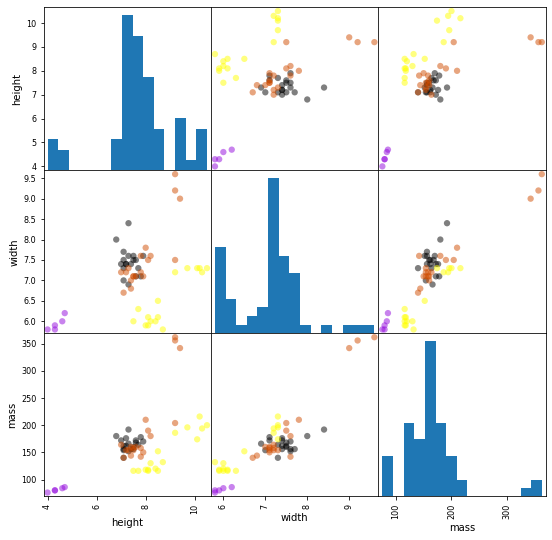

In [18]:
# scatter matrix
from matplotlib import cm

X = df_fruits[['height', 'width', 'mass']]
y = df_fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

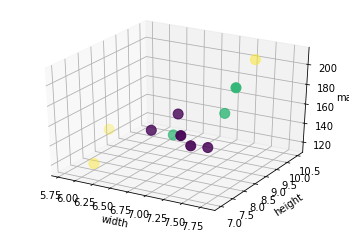

In [15]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['mass'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

### Normalisation et train-test split

In [18]:
from sklearn import preprocessing
X = df_fruits[['mass', 'width', 'height']]
y = df_fruits['fruit_label']
scaler = preprocessing.MinMaxScaler()
X_scale= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=42)

### Create classifier object

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)

### Train the classifier (fit the estimator) using the training data

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Estimate the accuracy of the classifier on future data, using the test data

In [8]:
knn.score(X_test, y_test)

0.6666666666666666

### Prédictions

In [9]:
# mass 20g, width 4.3 cm, height 5.5 cm
X1 = scaler.transform([[20, 4.3, 5.5]])
fruit_prediction = knn.predict(X1)
fruits[fruit_prediction[0]]

'mandarin'

In [10]:
# mass 100g, width 6.3 cm, height 8.5 cm
X2=scaler.transform([[100, 6.3, 8.5]])
fruit_prediction = knn.predict(X2)
fruits[fruit_prediction[0]]

'lemon'

### Matrice de confusion

In [11]:
from sklearn import metrics
prediction =knn.predict(X_scale)
print(metrics.confusion_matrix(y, prediction))

[[16  0  3  0]
 [ 0  5  0  0]
 [ 6  0 13  0]
 [ 0  0  1 15]]


### Influence du paramètre 'k'

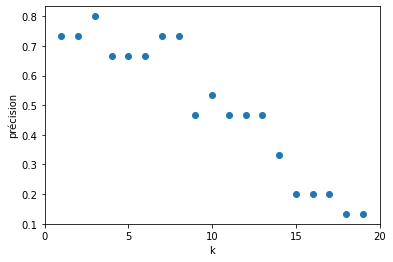

In [12]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('précision')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### Influence de la proportion dans le train/test split 

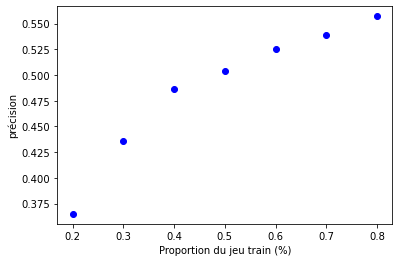

In [13]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Proportion du jeu train (%)')
plt.ylabel('précision');